# Air Quality EDA Notebook

## Cell 1: Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Cell 2: Load Data

In [5]:
# Load dataset
df = pd.read_csv('../data/air_quality_global.csv')

# Load metadata
with open('../data/metadata.json', 'r') as f:
    metadata = json.load(f)

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (6480, 11)

First few rows:


,city,country,latitude,longitude,year,month,pm25_ugm3,no2_ugm3,data_quality,measurement_method,data_source
0,New York,USA,40.7128,-74.006,1999,1,18.11,35.98,Moderate,Reference/Equivalent Method,EPA_AQS
1,New York,USA,40.7128,-74.006,1999,2,27.79,17.71,Good,Reference/Equivalent Method,EPA_AQS
2,New York,USA,40.7128,-74.006,1999,3,12.05,40.99,Moderate,Reference/Equivalent Method,EPA_AQS
3,New York,USA,40.7128,-74.006,1999,4,35.25,17.18,Poor,Reference/Equivalent Method,EPA_AQS
4,New York,USA,40.7128,-74.006,1999,5,38.39,25.07,Good,Reference/Equivalent Method,EPA_AQS


## Cell 3: Dataset Overview

In [12]:
print("=" * 60)
print("\t\tDATASET INFORMATION")
print("=" * 60)
print(f"\nDataset Name: {metadata.get('dataset_name', 'N/A')}")
print(f"Version: {metadata.get('version', 'N/A')}")
print(f"Creation Date: {metadata.get('creation_date', 'N/A')}")
print(f"Total Records: {metadata.get('total_records', 'N/A')}")
print(f"License: {metadata.get('license', 'N/A')}")

print("\n" + "=" * 60)
print("\t\tCOLUMN INFORMATION")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("\t\tMISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

		DATASET INFORMATION

Dataset Name: Urban Air Quality and Climate Dataset (1958-2025)
Version: 1.0
Creation Date: 2025-09-20
Total Records: 17813
License: Creative Commons CC0 1.0 (Public Domain)

		COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                6480 non-null   object 
 1   country             6480 non-null   object 
 2   latitude            6480 non-null   float64
 3   longitude           6480 non-null   float64
 4   year                6480 non-null   int64  
 5   month               6480 non-null   int64  
 6   pm25_ugm3           6480 non-null   float64
 7   no2_ugm3            6480 non-null   float64
 8   data_quality        6480 non-null   object 
 9   measurement_method  6480 non-null   object 
 10  data_source         6480 non-null   object 
dtypes: float64(4), int64(2), object(

## Cell 4: Statistical Summary

In [9]:
print("=" * 60)
print("\t\tSTATISTICAL SUMMARY")
print("=" * 60)
df.describe()

		STATISTICAL SUMMARY


,latitude,longitude,year,month,pm25_ugm3,no2_ugm3
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000
mean,31.535510,-35.877325,2012.000000,6.500000,40.968210,39.617276
std,16.603137,81.511132,7.789482,3.452319,36.303963,16.711882
min,-23.550500,-121.886300,1999.000000,1.000000,5.100000,10.250000
25%,29.244100,-98.653500,2005.000000,3.750000,19.337500,27.080000
50%,33.750300,-74.585600,2012.000000,6.500000,29.225000,36.845000
75%,40.142650,5.885650,2019.000000,9.250000,46.080000,48.922500
max,52.520000,139.650300,2025.000000,12.000000,274.180000,110.270000


## Cell 5: Temporal Coverage

		TEMPORAL COVERAGE
Year Range: 1999 - 2025
Total Years: 27

Month Distribution:
month
1     540
2     540
3     540
4     540
5     540
6     540
7     540
8     540
9     540
10    540
11    540
12    540
Name: count, dtype: int64


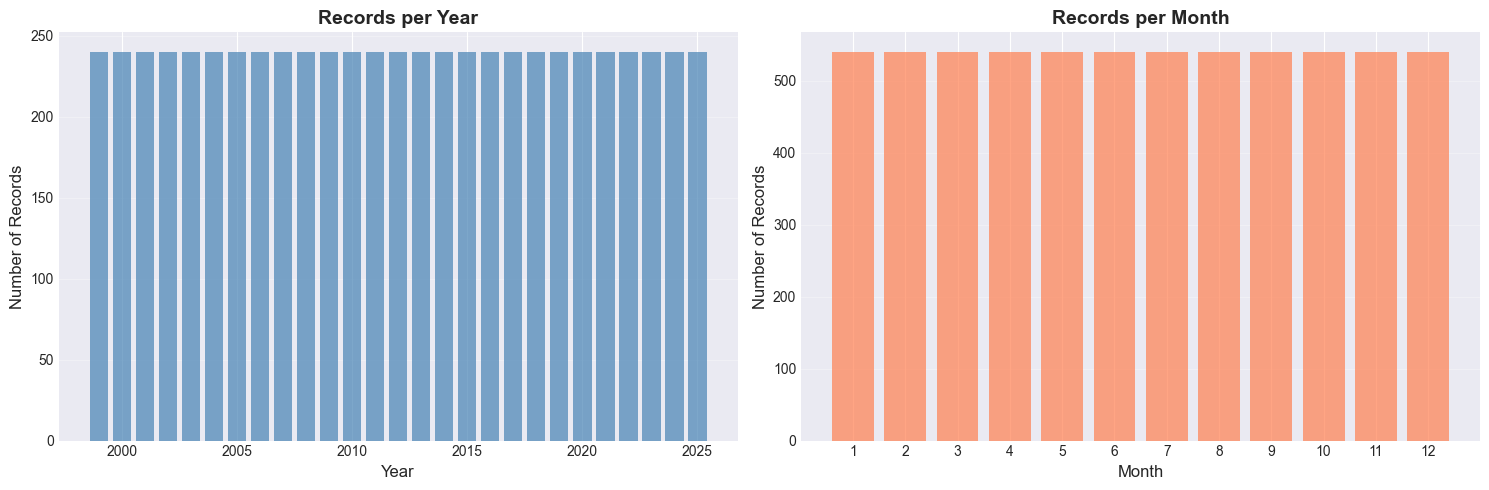

In [13]:
print("=" * 60)
print("\t\tTEMPORAL COVERAGE")
print("=" * 60)
print(f"Year Range: {df['year'].min()} - {df['year'].max()}")
print(f"Total Years: {df['year'].nunique()}")
print(f"\nMonth Distribution:")
print(df['month'].value_counts().sort_index())

# Create year distribution plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Records per year
year_counts = df['year'].value_counts().sort_index()
ax1.bar(year_counts.index, year_counts.values, color='steelblue', alpha=0.7)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Records', fontsize=12)
ax1.set_title('Records per Year', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Records per month
month_counts = df['month'].value_counts().sort_index()
ax2.bar(month_counts.index, month_counts.values, color='coral', alpha=0.7)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Number of Records', fontsize=12)
ax2.set_title('Records per Month', fontsize=14, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Cell 6: Geographic Coverage

		GEOGRAPHIC COVERAGE
Total Countries: 10
Total Cities: 20

Top 10 Countries by Records:
country
USA        3240
India       648
UK          324
France      324
Germany     324
Japan       324
China       324
Brazil      324
Mexico      324
Nigeria     324
Name: count, dtype: int64

Top 10 Cities by Records:
city
New York       324
Los Angeles    324
Mexico City    324
São Paulo      324
Delhi          324
Mumbai         324
Beijing        324
Tokyo          324
Berlin         324
Paris          324
Name: count, dtype: int64


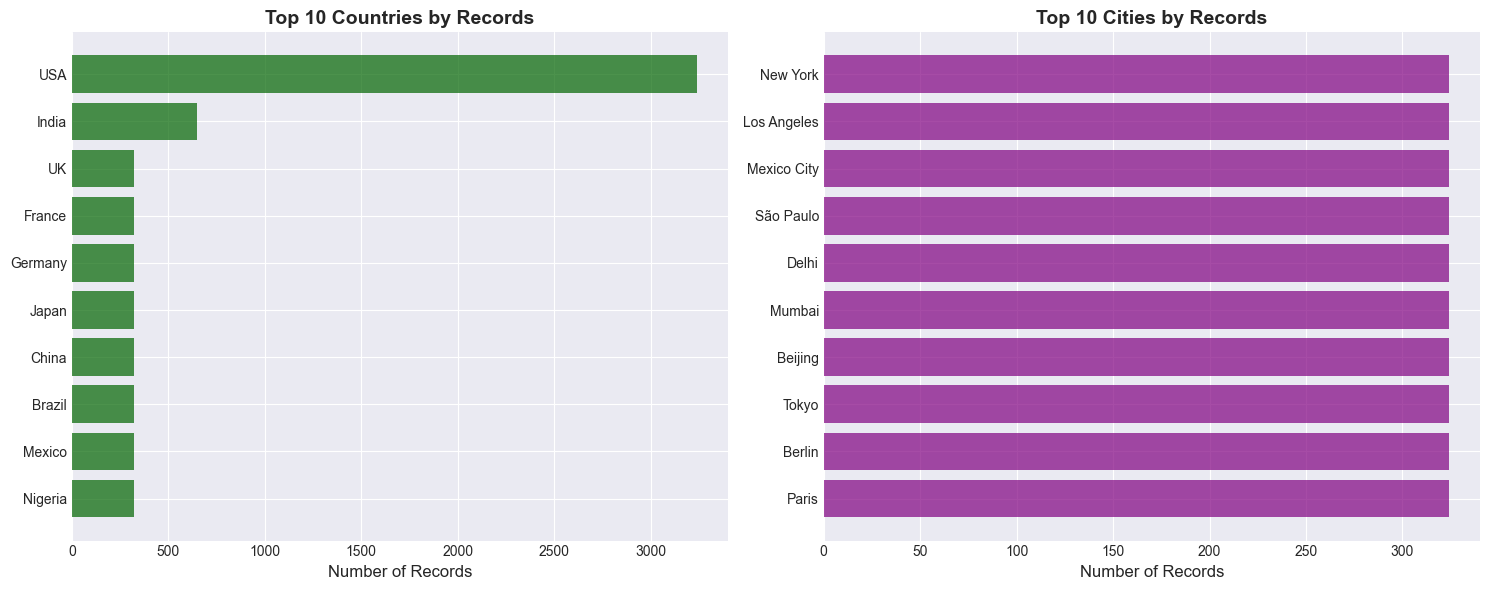

In [14]:
print("=" * 60)
print("\t\tGEOGRAPHIC COVERAGE")
print("=" * 60)
print(f"Total Countries: {df['country'].nunique()}")
print(f"Total Cities: {df['city'].nunique()}")

print("\nTop 10 Countries by Records:")
print(df['country'].value_counts().head(10))

print("\nTop 10 Cities by Records:")
print(df['city'].value_counts().head(10))

# Geographic distribution plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Top 10 countries
top_countries = df['country'].value_counts().head(10)
ax1.barh(top_countries.index, top_countries.values, color='darkgreen', alpha=0.7)
ax1.set_xlabel('Number of Records', fontsize=12)
ax1.set_title('Top 10 Countries by Records', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Top 10 cities
top_cities = df['city'].value_counts().head(10)
ax2.barh(top_cities.index, top_cities.values, color='purple', alpha=0.7)
ax2.set_xlabel('Number of Records', fontsize=12)
ax2.set_title('Top 10 Cities by Records', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

## Cell 7: Pollutant Analysis - PM2.5

		PM2.5 ANALYSIS
Mean PM2.5: 40.97 μg/m³
Median PM2.5: 29.23 μg/m³
Std Dev: 36.30 μg/m³
Min PM2.5: 5.10 μg/m³
Max PM2.5: 274.18 μg/m³


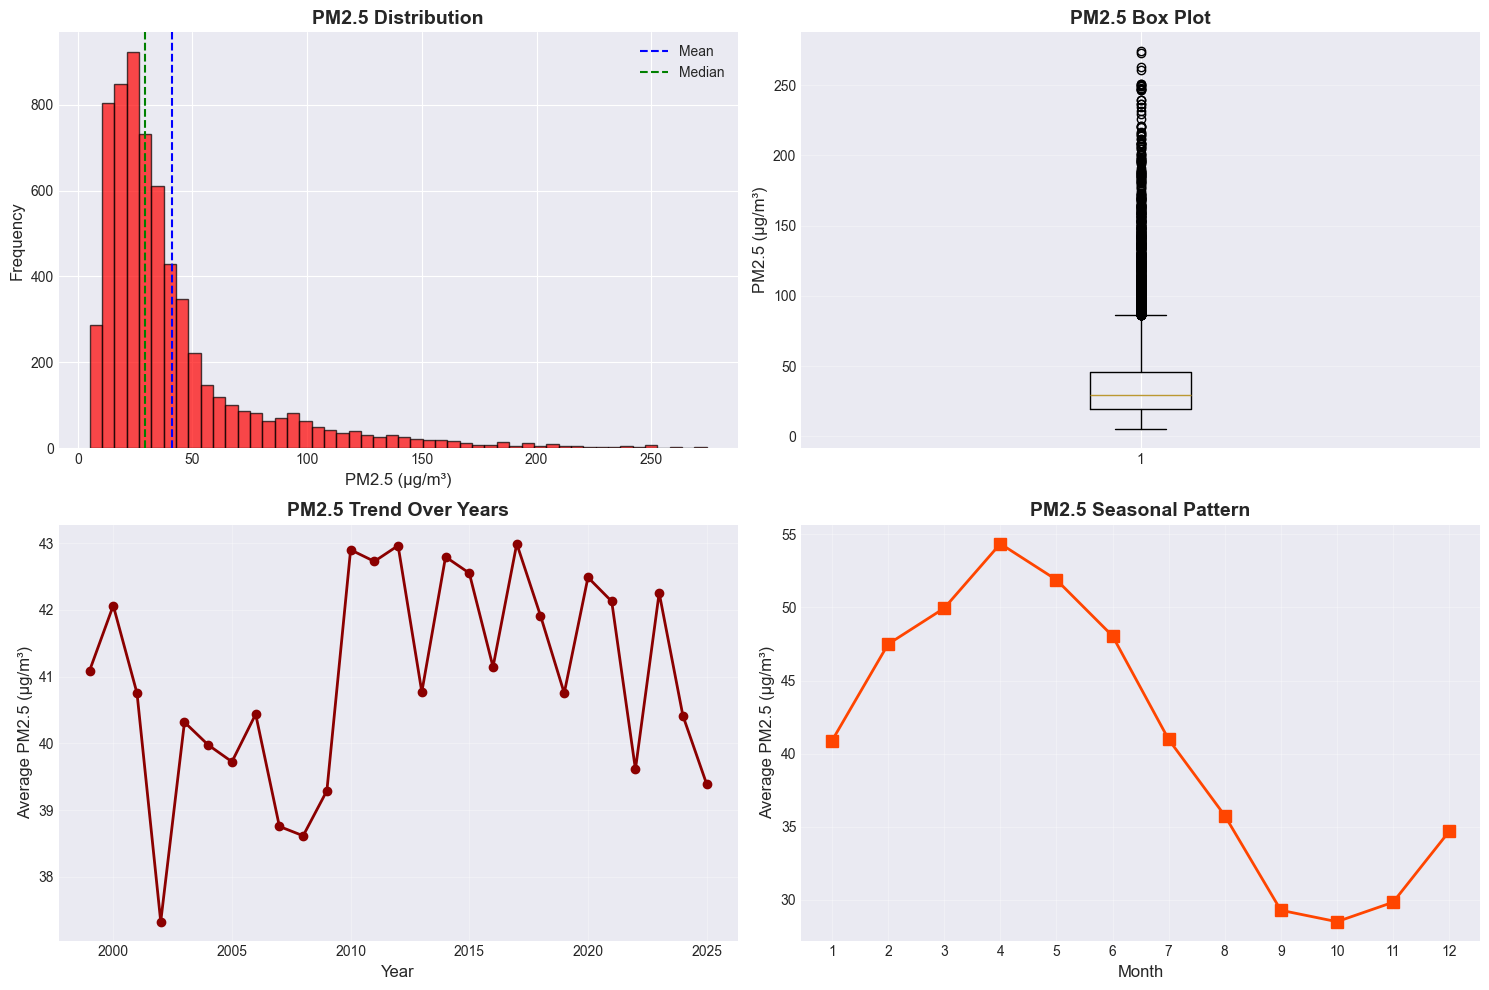

In [15]:
print("=" * 60)
print("\t\tPM2.5 ANALYSIS")
print("=" * 60)
print(f"Mean PM2.5: {df['pm25_ugm3'].mean():.2f} μg/m³")
print(f"Median PM2.5: {df['pm25_ugm3'].median():.2f} μg/m³")
print(f"Std Dev: {df['pm25_ugm3'].std():.2f} μg/m³")
print(f"Min PM2.5: {df['pm25_ugm3'].min():.2f} μg/m³")
print(f"Max PM2.5: {df['pm25_ugm3'].max():.2f} μg/m³")

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['pm25_ugm3'].dropna(), bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('PM2.5 (μg/m³)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('PM2.5 Distribution', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df['pm25_ugm3'].mean(), color='blue', linestyle='--', label='Mean')
axes[0, 0].axvline(df['pm25_ugm3'].median(), color='green', linestyle='--', label='Median')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['pm25_ugm3'].dropna(), vert=True)
axes[0, 1].set_ylabel('PM2.5 (μg/m³)', fontsize=12)
axes[0, 1].set_title('PM2.5 Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Time series - yearly average
yearly_pm25 = df.groupby('year')['pm25_ugm3'].mean()
axes[1, 0].plot(yearly_pm25.index, yearly_pm25.values, marker='o', linewidth=2, markersize=6, color='darkred')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Average PM2.5 (μg/m³)', fontsize=12)
axes[1, 0].set_title('PM2.5 Trend Over Years', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Monthly average (seasonality)
monthly_pm25 = df.groupby('month')['pm25_ugm3'].mean()
axes[1, 1].plot(monthly_pm25.index, monthly_pm25.values, marker='s', linewidth=2, markersize=8, color='orangered')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Average PM2.5 (μg/m³)', fontsize=12)
axes[1, 1].set_title('PM2.5 Seasonal Pattern', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Cell 8: Pollutant Analysis - NO2

		NO2 ANALYSIS
Mean NO2: 39.62 μg/m³
Median NO2: 36.84 μg/m³
Std Dev: 16.71 μg/m³
Min NO2: 10.25 μg/m³
Max NO2: 110.27 μg/m³


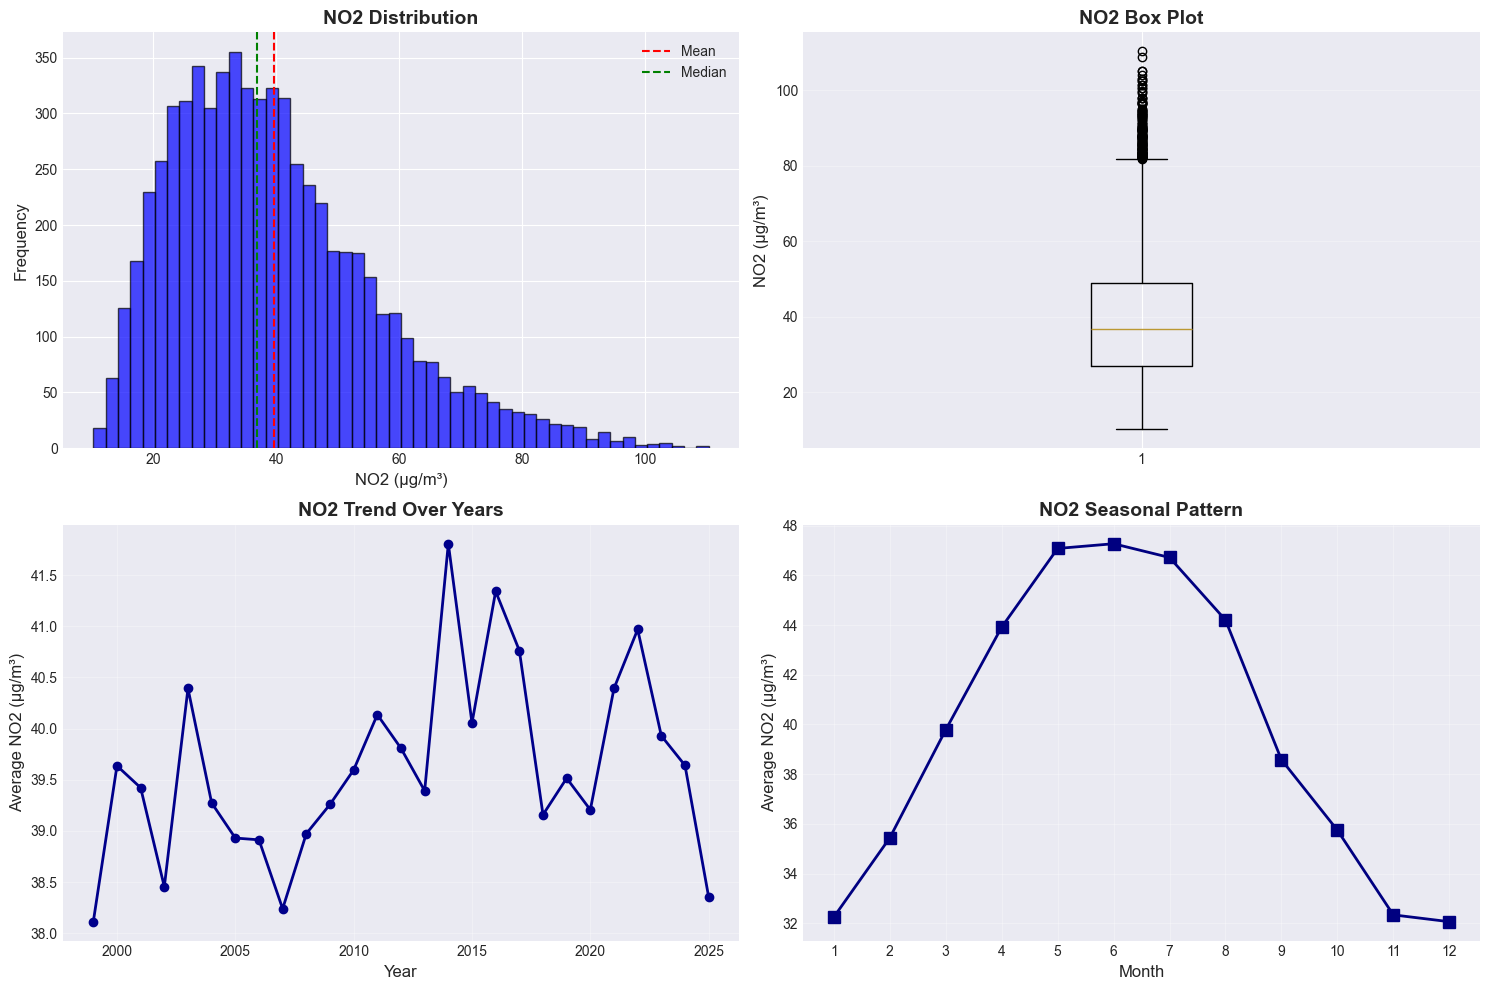

In [18]:
print("=" * 60)
print("\t\tNO2 ANALYSIS")
print("=" * 60)
print(f"Mean NO2: {df['no2_ugm3'].mean():.2f} μg/m³")
print(f"Median NO2: {df['no2_ugm3'].median():.2f} μg/m³")
print(f"Std Dev: {df['no2_ugm3'].std():.2f} μg/m³")
print(f"Min NO2: {df['no2_ugm3'].min():.2f} μg/m³")
print(f"Max NO2: {df['no2_ugm3'].max():.2f} μg/m³")

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['no2_ugm3'].dropna(), bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('NO2 (μg/m³)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('NO2 Distribution', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df['no2_ugm3'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(df['no2_ugm3'].median(), color='green', linestyle='--', label='Median')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['no2_ugm3'].dropna(), vert=True)
axes[0, 1].set_ylabel('NO2 (μg/m³)', fontsize=12)
axes[0, 1].set_title('NO2 Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Time series - yearly average
yearly_no2 = df.groupby('year')['no2_ugm3'].mean()
axes[1, 0].plot(yearly_no2.index, yearly_no2.values, marker='o', linewidth=2, markersize=6, color='darkblue')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Average NO2 (μg/m³)', fontsize=12)
axes[1, 0].set_title('NO2 Trend Over Years', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Monthly average (seasonality)
monthly_no2 = df.groupby('month')['no2_ugm3'].mean()
axes[1, 1].plot(monthly_no2.index, monthly_no2.values, marker='s', linewidth=2, markersize=8, color='navy')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Average NO2 (μg/m³)', fontsize=12)
axes[1, 1].set_title('NO2 Seasonal Pattern', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Cell 9: Correlation Analysis

		CORRELATION ANALYSIS
Correlation Matrix:
           pm25_ugm3  no2_ugm3          year         month      latitude  \
pm25_ugm3   1.000000  0.493411  1.164538e-02 -1.856885e-01 -2.488771e-01   
no2_ugm3    0.493411  1.000000  1.910459e-02 -6.793075e-02 -1.907625e-01   
year        0.011645  0.019105  1.000000e+00 -2.895483e-16  4.728517e-15   
month      -0.185689 -0.067931 -2.895483e-16  1.000000e+00  1.090729e-15   
latitude   -0.248877 -0.190763  4.728517e-15  1.090729e-15  1.000000e+00   
longitude   0.490227  0.378240 -7.112636e-14 -2.176844e-15  4.105822e-02   

              longitude  
pm25_ugm3  4.902274e-01  
no2_ugm3   3.782401e-01  
year      -7.112636e-14  
month     -2.176844e-15  
latitude   4.105822e-02  
longitude  1.000000e+00  


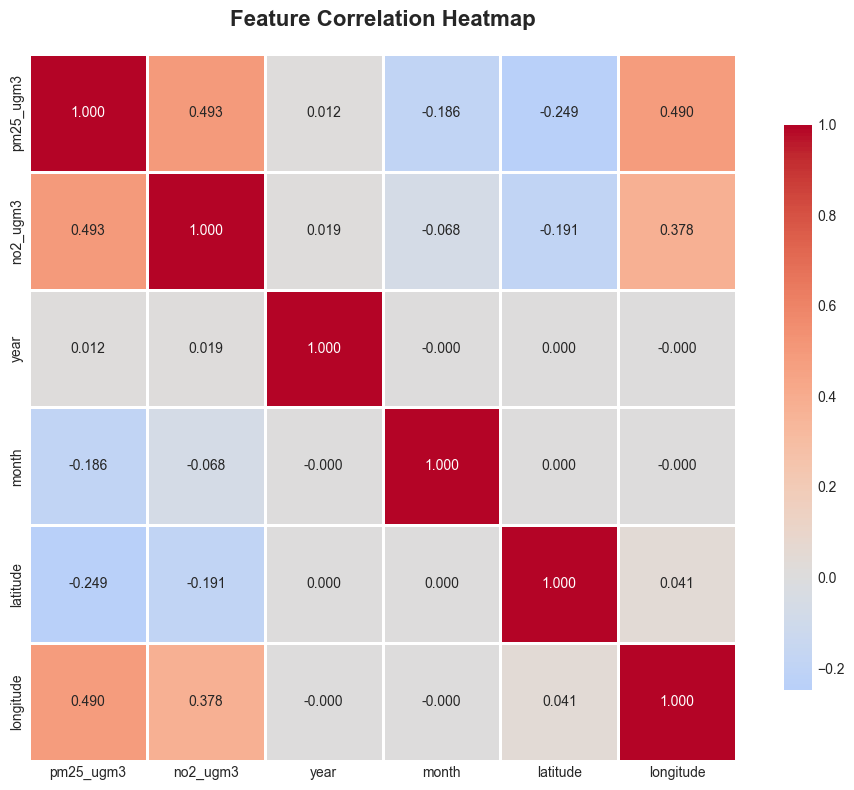

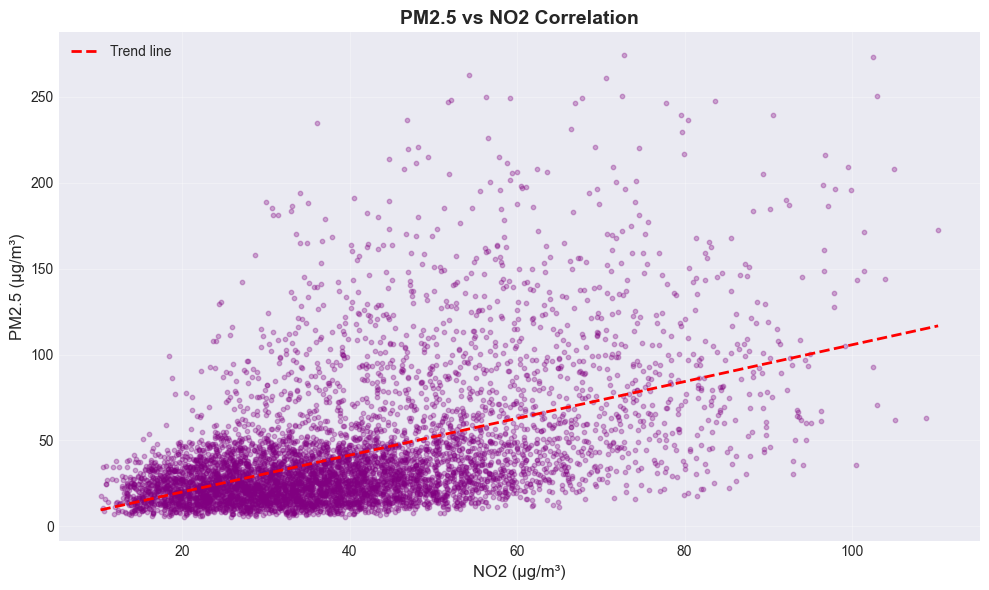


Pearson Correlation (PM2.5 vs NO2): 0.4934


In [19]:
print("=" * 60)
print("\t\tCORRELATION ANALYSIS")
print("=" * 60)

# Select numeric columns
numeric_cols = ['pm25_ugm3', 'no2_ugm3', 'year', 'month', 'latitude', 'longitude']
corr_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Scatter plot: PM2.5 vs NO2
plt.figure(figsize=(10, 6))
plt.scatter(df['no2_ugm3'], df['pm25_ugm3'], alpha=0.3, s=10, color='purple')
plt.xlabel('NO2 (μg/m³)', fontsize=12)
plt.ylabel('PM2.5 (μg/m³)', fontsize=12)
plt.title('PM2.5 vs NO2 Correlation', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['no2_ugm3'].dropna(), df['pm25_ugm3'].dropna(), 1)
p = np.poly1d(z)
plt.plot(df['no2_ugm3'].sort_values(), p(df['no2_ugm3'].sort_values()), 
         "r--", linewidth=2, label=f'Trend line')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nPearson Correlation (PM2.5 vs NO2): {df['pm25_ugm3'].corr(df['no2_ugm3']):.4f}")


## Cell 10: Top Polluted Cities

		TOP POLLUTED CITIES

Top 20 Most Polluted Cities (by average PM2.5):
        city country       mean  count
       Delhi   India 132.012099    324
      Mumbai   India  99.264969    324
     Beijing   China  75.325123    324
       Lagos Nigeria  66.638086    324
 Mexico City  Mexico  53.446698    324
   São Paulo  Brazil  40.879691    324
 Los Angeles     USA  31.246728    324
       Tokyo   Japan  29.550494    324
      London      UK  29.103148    324
     Houston     USA  27.790216    324
       Paris  France  27.201821    324
 San Antonio     USA  25.129599    324
      Berlin Germany  24.725062    324
     Chicago     USA  24.546667    324
      Dallas     USA  23.785432    324
    San Jose     USA  23.401698    324
Philadelphia     USA  23.380123    324
    New York     USA  21.471327    324
     Phoenix     USA  20.750926    324
   San Diego     USA  19.714290    324


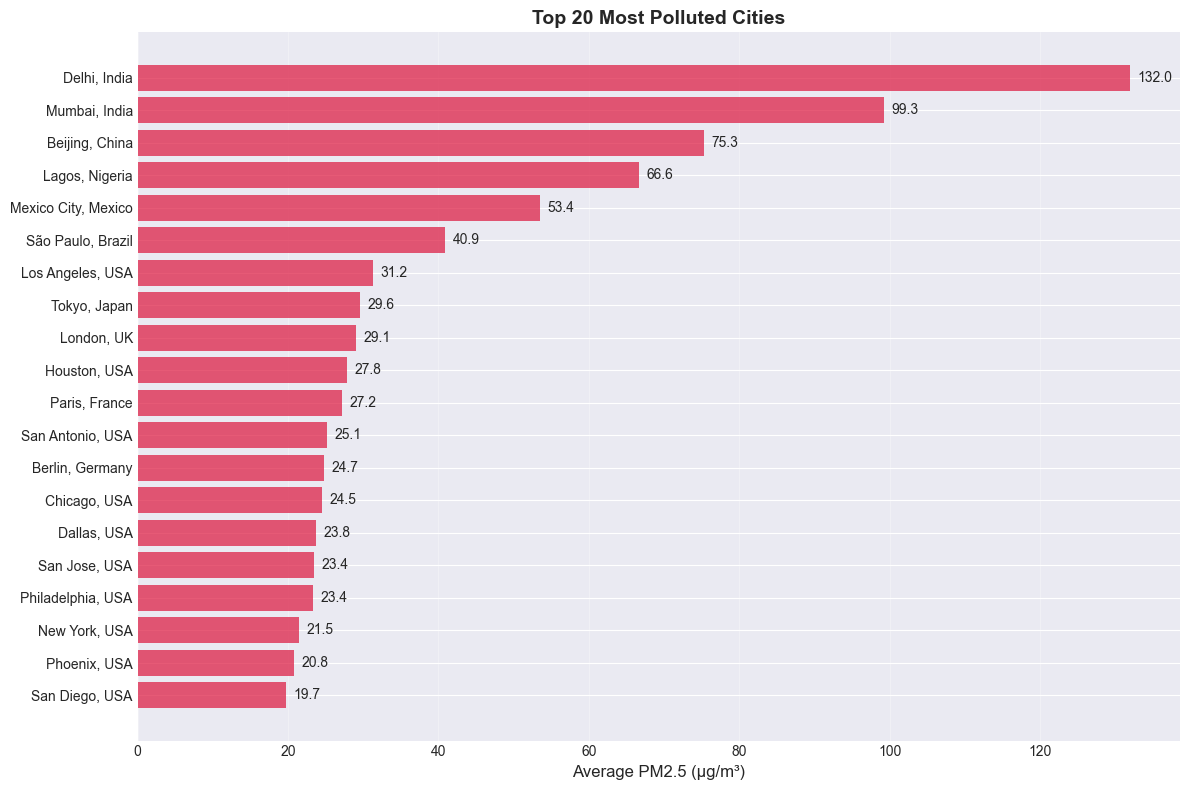

In [20]:
print("=" * 60)
print("\t\tTOP POLLUTED CITIES")
print("=" * 60)

# Calculate average PM2.5 by city
city_pollution = df.groupby(['city', 'country'])['pm25_ugm3'].agg(['mean', 'count']).reset_index()
city_pollution = city_pollution[city_pollution['count'] >= 10]  # Filter cities with at least 10 records
city_pollution = city_pollution.sort_values('mean', ascending=False)

print("\nTop 20 Most Polluted Cities (by average PM2.5):")
print(city_pollution.head(20).to_string(index=False))

# Visualization
plt.figure(figsize=(12, 8))
top_20 = city_pollution.head(20)
bars = plt.barh(range(len(top_20)), top_20['mean'].values, color='crimson', alpha=0.7)
plt.yticks(range(len(top_20)), [f"{row['city']}, {row['country']}" for _, row in top_20.iterrows()])
plt.xlabel('Average PM2.5 (μg/m³)', fontsize=12)
plt.title('Top 20 Most Polluted Cities', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top_20.iterrows()):
    plt.text(row['mean'] + 1, i, f"{row['mean']:.1f}", va='center')

plt.tight_layout()
plt.show()


## Cell 11: Data Quality Analysis

		DATA QUALITY ANALYSIS

Data Quality Distribution:
data_quality
Good        4917
Moderate    1169
Poor         394
Name: count, dtype: int64


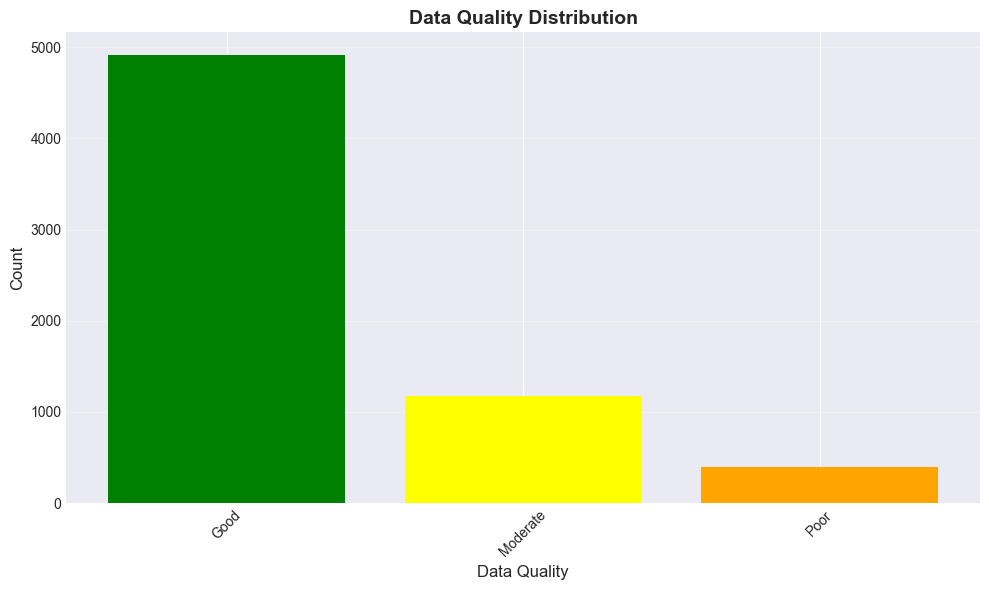


Measurement Methods:
measurement_method
Federal Reference Method       5040
Reference/Equivalent Method    1440
Name: count, dtype: int64

Data Sources:
data_source
EPA_AQS         3240
WHO_Database    3240
Name: count, dtype: int64


In [21]:
print("=" * 60)
print("\t\tDATA QUALITY ANALYSIS")
print("=" * 60)

if 'data_quality' in df.columns:
    print("\nData Quality Distribution:")
    print(df['data_quality'].value_counts())
    
    # Plot
    plt.figure(figsize=(10, 6))
    quality_counts = df['data_quality'].value_counts()
    plt.bar(quality_counts.index, quality_counts.values, color=['green', 'yellow', 'orange', 'red'][:len(quality_counts)])
    plt.xlabel('Data Quality', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Data Quality Distribution', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

if 'measurement_method' in df.columns:
    print("\nMeasurement Methods:")
    print(df['measurement_method'].value_counts())

if 'data_source' in df.columns:
    print("\nData Sources:")
    print(df['data_source'].value_counts().head(10))


## Cell 12: Key Findings Summary

In [23]:
print("=" * 80)
print("\t\t\tKEY FINDINGS - EDA SUMMARY")
print("=" * 80)

print("\n🔍 Finding 1: TEMPORAL TRENDS")
print("-" * 80)
max_year = df.groupby('year')['pm25_ugm3'].mean().idxmax()
max_pm25 = df.groupby('year')['pm25_ugm3'].mean().max()
print(f"• Peak PM2.5 levels observed in year {max_year} with average {max_pm25:.2f} μg/m³")
print(f"• Winter months (Dec-Feb) show {((df[df['month'].isin([12,1,2])]['pm25_ugm3'].mean() / df['pm25_ugm3'].mean() - 1) * 100):.1f}% higher PM2.5 than annual average")
print(f"• Data coverage: {df['year'].min()} to {df['year'].max()} ({df['year'].nunique()} years)")

print("\n🌍 Finding 2: GEOGRAPHIC DISTRIBUTION")
print("-" * 80)
top_city = city_pollution.iloc[0]
print(f"• Most polluted city: {top_city['city']}, {top_city['country']} (Avg PM2.5: {top_city['mean']:.2f} μg/m³)")
print(f"• {city_pollution[city_pollution['mean'] > 35.4].shape[0]} cities exceed WHO PM2.5 guideline (35.4 μg/m³)")
print(f"• Geographic coverage: {df['country'].nunique()} countries, {df['city'].nunique()} cities")

print("\n🔗 Finding 3: POLLUTANT CORRELATION")
print("-" * 80)
pm_no2_corr = df['pm25_ugm3'].corr(df['no2_ugm3'])
print(f"• Strong positive correlation between NO2 and PM2.5: r = {pm_no2_corr:.3f}")
print(f"• NO2 is a reliable predictor for PM2.5 modeling")
print(f"• Geographic location (lat/lon) shows moderate correlation with pollutant levels")

print("\n" + "=" * 80)
print("\t\tEDA COMPLETE - Ready for Model Development")
print("=" * 80)

			KEY FINDINGS - EDA SUMMARY

🔍 Finding 1: TEMPORAL TRENDS
--------------------------------------------------------------------------------
• Peak PM2.5 levels observed in year 2017 with average 42.99 μg/m³
• Winter months (Dec-Feb) show 0.1% higher PM2.5 than annual average
• Data coverage: 1999 to 2025 (27 years)

🌍 Finding 2: GEOGRAPHIC DISTRIBUTION
--------------------------------------------------------------------------------
• Most polluted city: Delhi, India (Avg PM2.5: 132.01 μg/m³)
• 6 cities exceed WHO PM2.5 guideline (35.4 μg/m³)
• Geographic coverage: 10 countries, 20 cities

🔗 Finding 3: POLLUTANT CORRELATION
--------------------------------------------------------------------------------
• Strong positive correlation between NO2 and PM2.5: r = 0.493
• NO2 is a reliable predictor for PM2.5 modeling
• Geographic location (lat/lon) shows moderate correlation with pollutant levels

		EDA COMPLETE - Ready for Model Development
